In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
PROJECT_ROOT_DIR = '/content/drive/MyDrive/signlab/이지지오_분석'

In [4]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import pandas as pd
import numpy as np
import os

# 진행률 표시
from tqdm.auto import tqdm

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
""
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['font.size'] = 23
mpl.rcParams['figure.figsize'] = (20, 20)
fm._rebuild()

# 한글 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
#mpl.rc('font', family='Malgun Gothic') #윈도우, 구글 콜랩
mpl.rc('font', family=font_name) #윈도우, 구글 콜랩
mpl.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# 그림을 저장할 위치
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    #print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

검사계열ID 만 뽑아내면 데이터의 수가 30개 뿐임

In [8]:
df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR,'2.Data_T_B_GAF(검사계열내역)_210910b.xlsx'),
                   header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   I_GAF     30 non-null     object 
 1   I_GAE     30 non-null     object 
 2   T_GAF1    30 non-null     object 
 3   S_SRT_GD  30 non-null     int64  
 4   Q_GAF1    30 non-null     float64
 5   Q_GAF2    30 non-null     float64
 6   Q_RNG_P   30 non-null     float64
 7   Q_RNG_M   30 non-null     float64
 8   Q_GAF     30 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.2+ KB


In [11]:
df.set_index('I_GAE', inplace=True)

In [31]:
df5=df.loc[['GC0005'],:]
df5 = df5[['T_GAF1', 'Q_GAF1', 'Q_GAF2', 'Q_RNG_P']]
df5

,T_GAF1,Q_GAF1,Q_GAF2,Q_RNG_P
I_GAE,,,,
GC0005,HEX,26.5,27.0,0.0
GC0005,전장,51.7,52.3,0.3
GC0005,내경1,15.8,16.2,0.2
GC0005,내경2,15.8,16.2,0.2
GC0005,나사1,0.0,0.0,0.0
GC0005,나사2,0.0,0.0,0.0


## 추후 T_M_CHL 데이터의 결과 값을 통해 분석 예정


- T_B_CHL이 아닌 T_M_CHL 파일만 있음
- T_M_CHL의 GD00000025~GD00000030 => GC0005의 HEX, 전장, 내경1, 내경2, 나사1, 나사2
- 20482중 315개의 점검기록 분석 필요
- 315개의 데이터 T_CHL별로 시각화 필요
- 기준, 상한값, 하한값 가로 점선 그리기
- 추후 조충종물 별로도 시각화



In [ ]:
df = pd.read_excel(os.path.join(PROJECT_ROOT_DIR,'3.Data_T_M_CHL(검사값)_210910c.xlsx'),
                   header=1)
df.info()

In [ ]:
sample_df_names=['I_GAF', 'T_CHL', 'I_SC_MT']
sample_df=df[sample_df_names]
sample_df

In [35]:
sample_df.set_index('I_GAF', inplace=True)

### HEX
- 데이터가 하나뿐

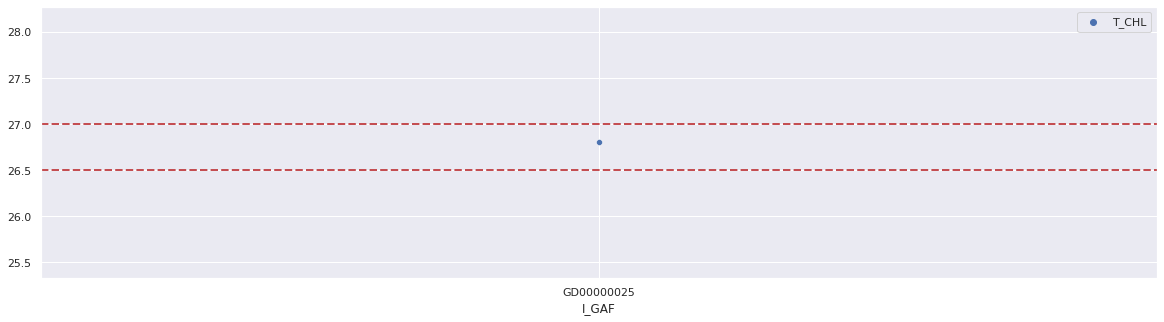

In [102]:
hex_df = sample_df.loc[['GD00000025'],:]
plt.figure(figsize=(20,5))
ax=sns.scatterplot(data=hex_df)
plt.axhline(y=26.5,color='r', linewidth=2, linestyle='--')
plt.axhline(y=27,color='r', linewidth=2, linestyle='--')

### 전장

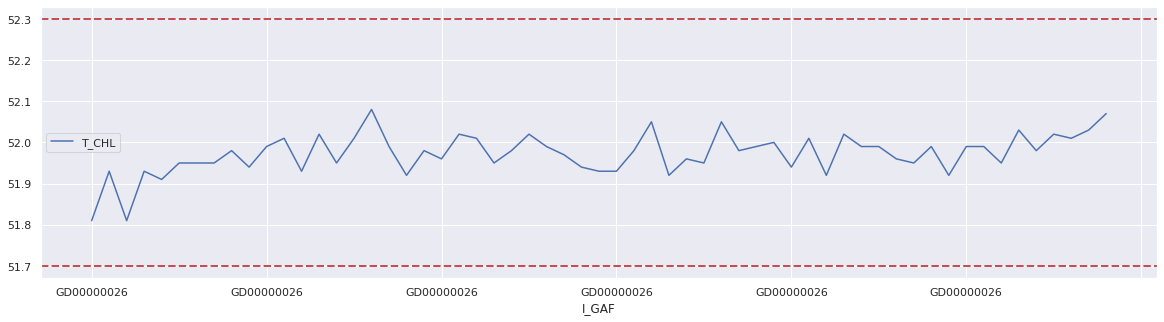

In [100]:
j_df = sample_df.loc[['GD00000026'],:]
j_df.plot(figsize=(20,5))
# 기준값
plt.axhline(y=51.7,color='r', linewidth=2, linestyle='--')
# MAX
plt.axhline(y=52.3,color='r', linewidth=2, linestyle='--')

### 내정1

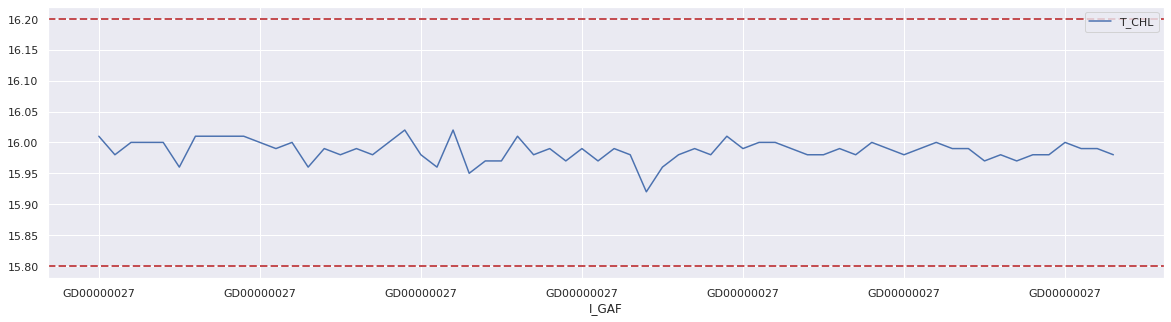

In [99]:
n1_df = sample_df.loc[['GD00000027'],:]
n1_df.plot(figsize=(20,5))
# 기준값
plt.axhline(y=15.8,color='r', linewidth=2, linestyle='--')
# MAX
plt.axhline(y=16.2,color='r', linewidth=2, linestyle='--')

### 내정2

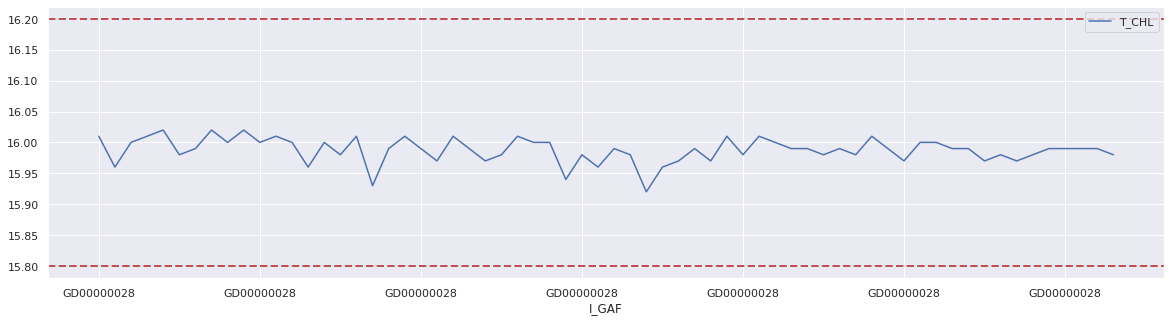

In [101]:
n2_df = sample_df.loc[['GD00000028'],:]
n2_df.plot(figsize=(20,5))
# 기준값
plt.axhline(y=15.8,color='r', linewidth=2, linestyle='--')
# MAX
plt.axhline(y=16.2,color='r', linewidth=2, linestyle='--')

### 나사 1, 2 는 점검기록이 '무' 라고 표시되어 시각화 불가